# Clustering
Mengxia Shi & Mikhail Zakharov | 5 SDBD B1

*2.5 sessions to finish this (1.5 left)*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics

## 1. Load data

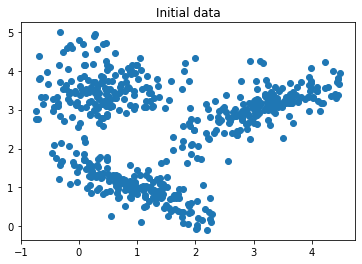

In [14]:
# Selected examples:
# dataset (true number of clusters)
# k-means (good): DS-577 (3), 2d-4c (4), R15 (15), spherical_5_2 (5)

dataset = 'DS-577.arff'
true_cluster_number = 3

data_path = "clustering-benchmark-master/src/main/resources/datasets/artificial/"

data_load = arff.loadarff(open(data_path + dataset, 'r'))[0]

x = [point[0] for point in data_load]
y = [point[1] for point in data_load]
data_xy = list(zip(x,y))

plt.scatter(x,y)
plt.title("Initial data")
plt.show()

## 2. k-Means

### 2.1.1 Clustering with known true number of clusters

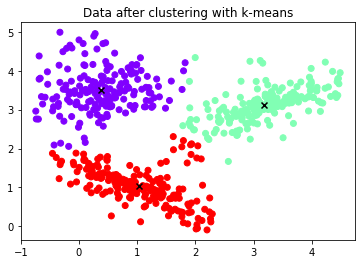

In [16]:
kmeans = cluster.KMeans(n_clusters=true_cluster_number, init='k-means++').fit(data)

center_x = [point[0] for point in kmeans.cluster_centers_]
center_y = [point[1] for point in kmeans.cluster_centers_]

plt.scatter(x, y, c=kmeans.labels_, cmap='rainbow')
plt.scatter(center_x, center_y, marker="x", c="#000")
plt.title("Data after clustering with k-means")
plt.show()

### 2.1.2 Automatically determining the true number of clusters using evaluation metrics

Many of the evaluation metrics provided by `sklearn.metrics` require knowledge of the ground truth. They are therefore academic in nature and shall not be considered, as in reality there is no known ground truth.

The metrics considered are therefore the:  
* Silhouette Coefficient,
* Calinski-Harabasz Index, and
* Davies-Bouldin Index

### 2.1.2.i Silhouette Coefficient

### 2.1.2.ii Calinski-Harabasz index

### 2.1.2.iii Davies–Bouldin index

In [213]:
min_score = 1 # Assumed max for DB index
score = 1.1
n_clust = 2
res = []
start_time = time.time()

# or just do 2-30 or something
while score < (min_score * 1.423):
    kmeans = KMeans(n_clusters=n_clust, init='k-means++').fit(me)
    
    score = davies_bouldin_score(me, kmeans.labels_)
    
    if score < min_score:
        min_score = score
    
    res.append((n_clust, score))
    
    n_clust += 1

print(min(res, key=lambda r: r[1]))

print("time of execution : %s" %(time.time() - start_time))


(3, 0.5159747512886118)
time of execution : 0.10553383827209473


### 2.2 Limits of k-means clustering

## Notes

Measure time:
* to compare between different clustering methods
* to see how execution time depends on number of clusters to calculate
* between different stop conditions\*

\* All these things are choices to justify. What stop condition to use (time vs. accuracy trade-off)? ...

## Links
* https://pymfe.readthedocs.io/en/latest/auto_examples/03_miscellaneous_examples/plot_using_pandas_csv_arff.html

* https://github.com/deric/clustering-benchmark